This is a text classification project using Natural Language Processing technique. The text classification is part of an online paid classification task. The data was gathered from performing the online tasks and recording the data.
The data gathered was only the data that had over 80% accuracy.

The Steps involved are:
    1. Loading all the necessary libraries
    2. Loading the data
    3. Text Cleaning 
    4. Text Preprocessing
    5. Data Splitting for Modelling
    6. Data Transformation
    7. Target column values balancing (for train data)
    8. Modelling
    9. Model Evaluation
    10. Model Serialization

In [1]:
import pandas as pd #reading in the data
import numpy as np ##numerical manipulation of the datasets

In [2]:
#text
import nltk                   
nltk.download("stopwords")    #Downloading the 'stopwords' corpus from nltk
import string                 #'string' module which contains string operations
import re                     # The 're' module which provides support for regular expressions
import json                   # Working with JSON data
from bs4 import BeautifulSoup #library for parsing HTML and XML documents

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kiptanui\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#Data Preprocessing
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
#Importing SMOTE class for handling imbalanced datasets
from imblearn.over_sampling import SMOTE

In [5]:
#Machine Learning Libraries for classification
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [6]:
from sklearn.model_selection import train_test_split, cross_val_score

In [7]:
#Importing evaluation metrics
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [8]:
#Deployment module
import streamlit as st  #For creating a web app  
import pickle           #For object serialization
import joblib           #For object serialization
from joblib import dump #Model saving

In [9]:
#Reading in the csv file
df = pd.read_csv('taac_assistant_taac_7.csv')
df

,TaskId,User_Search_Term,Ad,Website,Relevance
0,1,wwww ncquickpass com,Nc Quick Pass - Pay Your Bill Online,www.doxo.com/pay/nc-quick-pass,Other
1,2,peloton plano tx,Studio Cycle Comparison - Find The Best Exerci...,www.nordictrack.com/Studio-Cycles/S22i,Other
2,3,antelope canyon,Hotels near Antelope Canyon - 100% Real Custom...,www.booking.com/Antelope-Canyon/Hotels,Other
3,4,get vaccine after covid,Janssen COVID-19 Vaccine - Authorized For Emer...,www.janssencovid19vaccine.com,Other
4,5,ahs.com/my-accountlogin,Find First american home warranty login - Chec...,www.searchandshopping.org/Your Search/Results,Other
...,...,...,...,...,...
971,972,keto recipes when using balsamic vinaigrette,Keto Recipes - Easy Keto Cooking Ideas - Easy ...,www.diggsopp/keto/recipes,Good
972,973,for sale by owner tionesta pa,"All Tionesta Lots for Sale - Land in Tionesta, PA",homes.com,Good
973,974,top ten mba programs,Online Master in Software Dev. - Boston Univer...,bumetprograms.bu.edu/MS_Software/Development,Other
974,975,kindle app,Kindle app - Amazon Kindle App - Free Android ...,www.appconner.com/free-app/kindle,Good


In [10]:
#We can transform the Relevance column into our target varable

mapping = {
    'Good' : 1,
    'Other' : 0,
}
df['Relevance'] = df['Relevance'].replace(mapping)
df.head(10)

,TaskId,User_Search_Term,Ad,Website,Relevance
0,1,wwww ncquickpass com,Nc Quick Pass - Pay Your Bill Online,www.doxo.com/pay/nc-quick-pass,0
1,2,peloton plano tx,Studio Cycle Comparison - Find The Best Exerci...,www.nordictrack.com/Studio-Cycles/S22i,0
2,3,antelope canyon,Hotels near Antelope Canyon - 100% Real Custom...,www.booking.com/Antelope-Canyon/Hotels,0
3,4,get vaccine after covid,Janssen COVID-19 Vaccine - Authorized For Emer...,www.janssencovid19vaccine.com,0
4,5,ahs.com/my-accountlogin,Find First american home warranty login - Chec...,www.searchandshopping.org/Your Search/Results,0
5,6,nike,Shop Womens Shops: Amazon - Amazon.com Officia...,www.amazon.com/apparel/womens-shops,1
6,7,cfl fixture,Flashlight Accessories,www.Grainfer.com/Flashlights,0
7,8,nationwide pet insurance,2021's Top 10 Pet Insurance - Buyer's Guide (N...,buyersguide.org/Pet-Insurance,1
8,9,nike,Nike Official Site - Just Do It - Shop The Lat...,www.nike.com,1
9,10,used cars,CarMax Used Cars - Visit carmax.com - Large Na...,www.carmax.com/cars,1


In [11]:
# Check for any missing values
df.isnull().sum().any()

False

In [12]:
#No missing values

<AxesSubplot:>

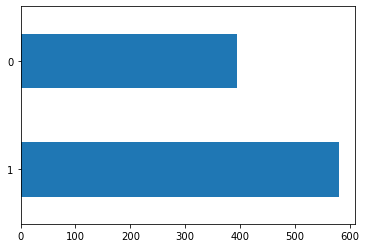

In [13]:
#Visualization of the overall distribution of the classes
df["Relevance"].value_counts().plot(kind = 'barh')

In [14]:
#The data is imbalanced, it has to be balanced

In [15]:
# Combine the three feature columns into one, separated by a space
df['Search_Term_Ad_Website'] = df['User_Search_Term'] + ' ' + df['Ad'] + ' ' + df['Website']

# Drop the individual feature columns
df = df.drop(['User_Search_Term', 'Ad', 'Website'], axis=1)

# Now, 'combined_features' will contain the combined text from the three columns


2024-01-21 15:54:02.952 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


In [16]:
#Reading in the combined features dataset
df.head(5)

,TaskId,Relevance,Search_Term_Ad_Website
0,1,0,wwww ncquickpass com Nc Quick Pass - Pay Your ...
1,2,0,peloton plano tx Studio Cycle Comparison - Fin...
2,3,0,antelope canyon Hotels near Antelope Canyon - ...
3,4,0,get vaccine after covid Janssen COVID-19 Vacci...
4,5,0,ahs.com/my-accountlogin Find First american ho...


In [17]:
#Dropping an unncessary column
new_df = df.drop(columns = ['TaskId'])
new_df.head()

,Relevance,Search_Term_Ad_Website
0,0,wwww ncquickpass com Nc Quick Pass - Pay Your ...
1,0,peloton plano tx Studio Cycle Comparison - Fin...
2,0,antelope canyon Hotels near Antelope Canyon - ...
3,0,get vaccine after covid Janssen COVID-19 Vacci...
4,0,ahs.com/my-accountlogin Find First american ho...


In [18]:
#We want to preprocess/clean this text first to remove things like punctuation symbols & ensure that our summary
#text is in lower case

In [19]:
space_replace = re.compile('[/(){}\[\]\|@,;)]')   #combine all the listed characters
bad_symbols = re.compile('[^0-9a-z #+_]')         #combine the listed characters
stopwords = nltk.corpus.stopwords.words('english') #filtering the English stopwords list from NLTK's corpus
urls = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|''[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+' 'rt')  #remove url links from text

In [20]:
def text_cleaning(text):
    text = BeautifulSoup(text, "lxml").text #Removing any html decoding
    text = text.lower()                     #Removing capitalization
    text = space_replace.sub(' ', text)     #replacing symbols with a space
    text = bad_symbols.sub('',text)         #Deleting symbols from text
    text = ' '.join(word for word in text.split() if word not in stopwords)   #Removing stopwords 
    text = urls.sub('', text)               #Removing urls
    return text

In [21]:
#applying our text cleaning function to our dataset
new_df['Search_Term_Ad_Website'] = new_df['Search_Term_Ad_Website'].apply(text_cleaning)
new_df.head()

,Relevance,Search_Term_Ad_Website
0,0,wwww ncquickpass com nc quick pass pay bill on...
1,0,peloton plano tx studio cycle comparison find ...
2,0,antelope canyon hotels near antelope canyon 10...
3,0,get vaccine covid janssen covid19 vaccine auth...
4,0,ahscom myaccountlogin find first american home...


In [22]:
#Defining the target and features
x = new_df['Search_Term_Ad_Website']
y = new_df['Relevance']

In [23]:
#Splitting the data for training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [24]:
y_train.head(2)

603    1
568    1
Name: Relevance, dtype: int64

In [25]:
x_train.head(2)

603    tinnitus ear protection ears ringing treatment...
568    hilton related hotels scraton wilks barre area...
Name: Search_Term_Ad_Website, dtype: object

DATA TRANSFORMATION

Transforming  the text to vector (numerical form) then fed to our model

In [26]:
#initialize vectorizer used for text data preprocessing:
count_vect = CountVectorizer()

In [27]:
count_vect=CountVectorizer(ngram_range=(1,3))

In [28]:
#We now need to transform our x_train and y_train so they are transformed 
#from text data to vectors

In [29]:
x_train_cv = count_vect.fit_transform(x_train)  #For test, we use only transform
x_test_cv = count_vect.transform(x_test)        #For train, we use fit_transform


In [30]:
# Save the fitted vectorizer
with open("count_vectorizer.pkl", "wb") as vectorizer_file:
    pickle.dump(count_vect, vectorizer_file)

In [31]:
#Shape of train data
y_train.shape

(683,)

In [32]:
#Shape of train data
x_train.shape

(683,)

In [33]:
x_train_cv.shape

(683, 18046)

Apply SMOTE to balance the dataset

In [34]:
smote = SMOTE(random_state=42)
x_train_cv_resampled, y_train_cv_resampled = smote.fit_resample(x_train_cv, y_train)

In [35]:
from collections import Counter

In [36]:
# Class distribution before applying SMOTE
print("Class distribution before SMOTE:", Counter(y_train))

Class distribution before SMOTE: Counter({1: 412, 0: 271})


In [37]:
# Class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_train_cv_resampled))

Class distribution after SMOTE: Counter({1: 412, 0: 412})


MODELLING

In [38]:
multinomial_nb = MultinomialNB()
logistic_rgr = LogisticRegression()
random_fr = RandomForestClassifier()
svm_model = SVC()

In [39]:
# List of different classification models 
models = {
    'Multinomial Naive Bayes': multinomial_nb,
    'Logistic Regression': logistic_rgr,
    'Random Forest': random_fr, 
    'svm':svm_model
}

# Function to initialize models, fit them to the training data, and make predictions on the test data
def classification_models():
    # Creating an empty dictionary to store model-score pairs
    model_scores = {}
    for model_name, model in models.items():
        
        model.fit(x_train_cv_resampled, y_train_cv_resampled)        
        predictions = model.predict(x_test_cv)
        
        # Calculating accuracy score for each model
        score = accuracy_score(predictions, y_test)
        model_scores[model_name] = score
    
    return model_scores


In [40]:
# Call the function and store the returned model-score pairs
model_accuracy_scores = classification_models()

for model, score in model_accuracy_scores.items():
    print(f"Model: {model}, Accuracy Score: {score}")


Model: Multinomial Naive Bayes, Accuracy Score: 0.621160409556314
Model: Logistic Regression, Accuracy Score: 0.5460750853242321
Model: Random Forest, Accuracy Score: 0.5187713310580204
Model: svm, Accuracy Score: 0.5085324232081911


In [41]:
# Iterate through models and generate confusion matrix and classification report
for model_name, model in models.items():
    y_pred = model.predict(x_test_cv)
    
    print(f"Confusion Matrix for {model_name}:")
    print(confusion_matrix(y_test, y_pred))
    
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))


Confusion Matrix for Multinomial Naive Bayes:
[[ 60  64]
 [ 47 122]]
Classification Report for Multinomial Naive Bayes:
              precision    recall  f1-score   support

           0       0.56      0.48      0.52       124
           1       0.66      0.72      0.69       169

    accuracy                           0.62       293
   macro avg       0.61      0.60      0.60       293
weighted avg       0.62      0.62      0.62       293

Confusion Matrix for Logistic Regression:
[[ 99  25]
 [108  61]]
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.48      0.80      0.60       124
           1       0.71      0.36      0.48       169

    accuracy                           0.55       293
   macro avg       0.59      0.58      0.54       293
weighted avg       0.61      0.55      0.53       293

Confusion Matrix for Random Forest:
[[115   9]
 [132  37]]
Classification Report for Random Forest:
              

In [42]:
def predict_rel(predict_relevance, models):
    combined_text = ' '.join(predict_relevance)
    cleaned_text = text_cleaning(combined_text)
    text_features = count_vect.transform([cleaned_text])
    
    # Dictionary to store predictions for each model
    predictions = {}
    
    # Loop through each model and make predictions
    for model_name, model in models.items():
        prediction = model.predict(text_features)
        predictions[model_name] = prediction
    
    return predictions

predict_relevance = ["wheres my refund", "E-file Online Income Tax Preparation & Electronic Filing", "e-file.com"]

# 'models' dictionary containing instances of the models (MultinomialNB, LogisticRegression, RandomForestClassifier, )
models = {
    'Multinomial Naive Bayes': multinomial_nb,
    'Logistic Regression': logistic_rgr,
    'Random Forest': random_fr,
    'svm': svm_model
}

predicted_scores = predict_rel(predict_relevance, models)
print(predicted_scores)


{'Multinomial Naive Bayes': array([0], dtype=int64), 'Logistic Regression': array([0], dtype=int64), 'Random Forest': array([0], dtype=int64), 'svm': array([0], dtype=int64)}


In [43]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("mnb_classifier.pkl","wb")
pickle.dump(multinomial_nb, pickle_out)
pickle_out.close()